## Importing the Library files

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
# current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

import missingno as msno # missing data visualization module for Python
from pandas_profiling import ProfileReport
import pandas_profiling

import gc
import datetime

%matplotlib inline
color = sns.color_palette()

In [2]:
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 100)

# <span class="mark">Stage 1: Business understanding and data collection</span> 

In [3]:
# specify encoding to deal with different formats
df = pd.read_csv('data.csv', encoding = 'ISO-8859-1')

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
# change the column names
df.rename(index=str, columns={'InvoiceNo': 'invoice_num',
                              'StockCode' : 'stock_code',
                              'Description' : 'description',
                              'Quantity' : 'quantity',
                              'InvoiceDate' : 'invoice_date',
                              'UnitPrice' : 'unit_price',
                              'CustomerID' : 'cust_id',
                              'Country' : 'country'}, inplace=True)

In [6]:
df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# <span class="mark">Stage 2: Data Cleaning and Preprocessing</span> 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   invoice_num   541909 non-null  object 
 1   stock_code    541909 non-null  object 
 2   description   540455 non-null  object 
 3   quantity      541909 non-null  int64  
 4   invoice_date  541909 non-null  object 
 5   unit_price    541909 non-null  float64
 6   cust_id       406829 non-null  float64
 7   country       541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 37.2+ MB


## Check missing values for each column 

In [8]:
# check missing values for each column 
df.isnull().sum().sort_values(ascending=False)

cust_id         135080
description       1454
invoice_num          0
stock_code           0
quantity             0
invoice_date         0
unit_price           0
country              0
dtype: int64

In [9]:
# check out the rows with missing values
df[df.isnull().any(axis=1)].head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


In [10]:
# change the invoice_date format - String to Timestamp format
df['invoice_date'] = pd.to_datetime(df.invoice_date, format='%m/%d/%Y %H:%M')

In [11]:
# change description - UPPER case to LOWER case
df['description'] = df.description.str.lower()

In [12]:
df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Remove rows with missing values 

In [13]:
# df_new without missing values
df_new = df.dropna()

In [14]:
# check missing values for each column 
df_new.isnull().sum().sort_values(ascending=False)

invoice_num     0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
cust_id         0
country         0
dtype: int64

In [15]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_num   406829 non-null  object        
 1   stock_code    406829 non-null  object        
 2   description   406829 non-null  object        
 3   quantity      406829 non-null  int64         
 4   invoice_date  406829 non-null  datetime64[ns]
 5   unit_price    406829 non-null  float64       
 6   cust_id       406829 non-null  float64       
 7   country       406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [16]:
# change columns tyoe - String to Int type 
df_new['cust_id'] = df_new['cust_id'].astype('int64')

In [17]:
df_new.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [18]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_num   406829 non-null  object        
 1   stock_code    406829 non-null  object        
 2   description   406829 non-null  object        
 3   quantity      406829 non-null  int64         
 4   invoice_date  406829 non-null  datetime64[ns]
 5   unit_price    406829 non-null  float64       
 6   cust_id       406829 non-null  int64         
 7   country       406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.9+ MB


In [19]:
df_new.describe().round(2)

,quantity,unit_price,cust_id
count,406829.00,406829.00,406829.00
mean,12.06,3.46,15287.69
std,248.69,69.32,1713.60
min,-80995.00,0.00,12346.00
25%,2.00,1.25,13953.00
50%,5.00,1.95,15152.00
75%,12.00,3.75,16791.00
max,80995.00,38970.00,18287.00


## Remove **Quantity** with negative values

In [20]:
df_new = df_new[df_new.quantity > 0]

In [21]:
df_new.describe().round(2)

,quantity,unit_price,cust_id
count,397924.00,397924.00,397924.00
mean,13.02,3.12,15294.32
std,180.42,22.10,1713.17
min,1.00,0.00,12346.00
25%,2.00,1.25,13969.00
50%,6.00,1.95,15159.00
75%,12.00,3.75,16795.00
max,80995.00,8142.75,18287.00


## Add the column - amount_spent 

In [22]:
df_new['amount_spent'] = df_new['quantity'] * df_new['unit_price']

In [23]:
# rearrange all the columns for easy reference
df_new = df_new[['invoice_num','invoice_date','stock_code','description','quantity','unit_price','amount_spent','cust_id','country']]

## Add the columns - Month, Day and Hour for the invoice 

In [24]:
df_new.insert(loc=2, column='year_month', value=df_new['invoice_date'].map(lambda x: 100*x.year + x.month))
df_new.insert(loc=3, column='month', value=df_new.invoice_date.dt.month)
# +1 to make Monday=1.....until Sunday=7
df_new.insert(loc=4, column='day', value=(df_new.invoice_date.dt.dayofweek)+1)
df_new.insert(loc=5, column='hour', value=df_new.invoice_date.dt.hour)

In [25]:
df_new.head()

,invoice_num,invoice_date,year_month,month,day,hour,stock_code,description,quantity,unit_price,amount_spent,cust_id,country
0,536365,2010-12-01 08:26:00,201012,12,3,8,85123A,white hanging heart t-light holder,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,201012,12,3,8,71053,white metal lantern,6,3.39,20.34,17850,United Kingdom
2,536365,2010-12-01 08:26:00,201012,12,3,8,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850,United Kingdom
3,536365,2010-12-01 08:26:00,201012,12,3,8,84029G,knitted union flag hot water bottle,6,3.39,20.34,17850,United Kingdom
4,536365,2010-12-01 08:26:00,201012,12,3,8,84029E,red woolly hottie white heart.,6,3.39,20.34,17850,United Kingdom


# <span class="mark">Stage 3: Exploratory Data Analysis (EDA)</span> 

## How many orders made by the customers? 

In [26]:
df_new.groupby(by=['cust_id','country'], as_index=False)['invoice_num'].count().head()

,cust_id,country,invoice_num
0,12346,United Kingdom,1
1,12347,Iceland,182
2,12348,Finland,31
3,12349,Italy,73
4,12350,Norway,17


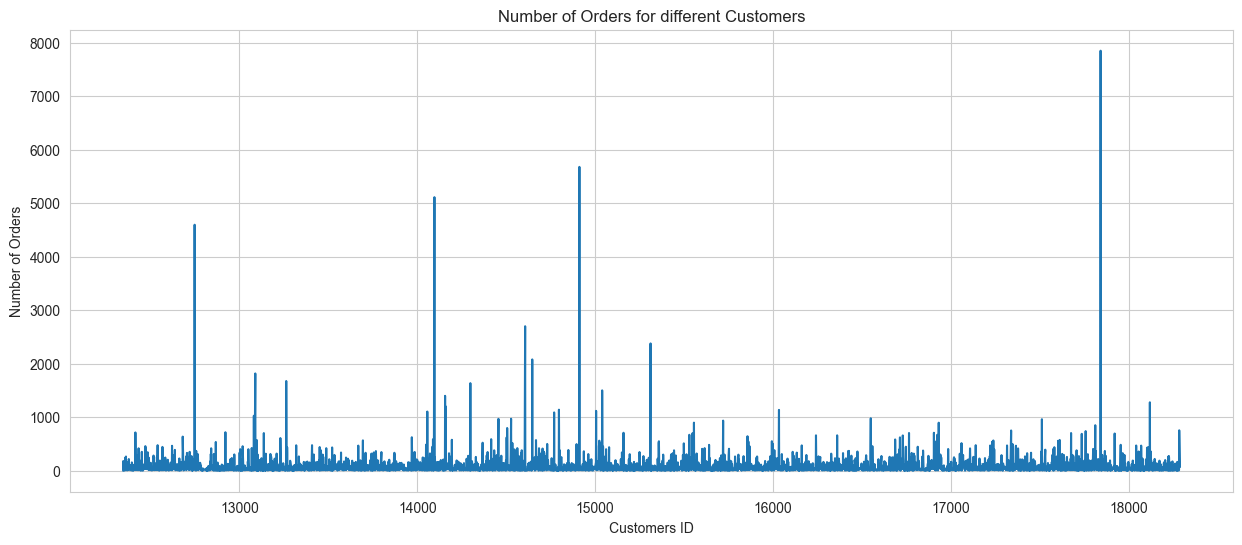

In [27]:
orders = df_new.groupby(by=['cust_id','country'], as_index=False)['invoice_num'].count()

plt.subplots(figsize=(15,6))
plt.plot(orders.cust_id, orders.invoice_num)
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()

### Check TOP 5 most number of orders 

In [28]:
print('The TOP 5 customers with most number of orders...')
orders.sort_values(by='invoice_num', ascending=False).head()

The TOP 5 customers with most number of orders...


,cust_id,country,invoice_num
4019,17841,United Kingdom,7847
1888,14911,EIRE,5677
1298,14096,United Kingdom,5111
334,12748,United Kingdom,4596
1670,14606,United Kingdom,2700


## How much money spent by the customers?

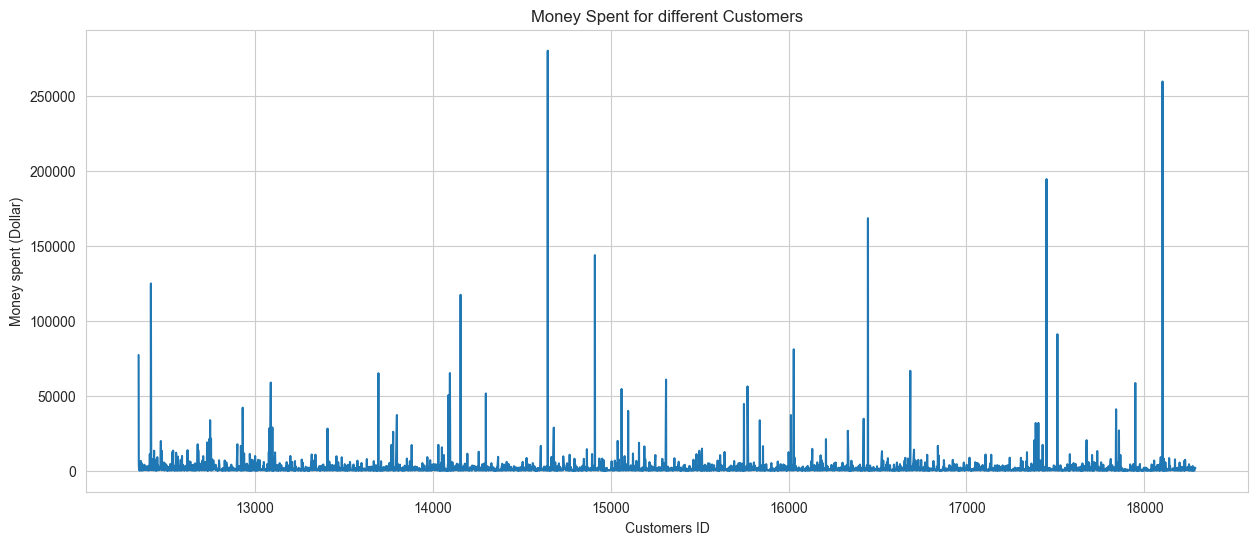

In [29]:
money_spent = df_new.groupby(by=['cust_id','country'], as_index=False)['amount_spent'].sum()

plt.subplots(figsize=(15,6))
plt.plot(money_spent.cust_id, money_spent.amount_spent)
plt.xlabel('Customers ID')
plt.ylabel('Money spent (Dollar)')
plt.title('Money Spent for different Customers')
plt.show()

### Check TOP 5 highest money spent 

In [30]:
print('The TOP 5 customers with highest money spent...')
money_spent.sort_values(by='amount_spent', ascending=False).head()

The TOP 5 customers with highest money spent...


,cust_id,country,amount_spent
1698,14646,Netherlands,280206.02
4210,18102,United Kingdom,259657.30
3737,17450,United Kingdom,194550.79
3017,16446,United Kingdom,168472.50
1888,14911,EIRE,143825.06


## How many orders (per month)?

In [31]:
df_new.head()

,invoice_num,invoice_date,year_month,month,day,hour,stock_code,description,quantity,unit_price,amount_spent,cust_id,country
0,536365,2010-12-01 08:26:00,201012,12,3,8,85123A,white hanging heart t-light holder,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,201012,12,3,8,71053,white metal lantern,6,3.39,20.34,17850,United Kingdom
2,536365,2010-12-01 08:26:00,201012,12,3,8,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850,United Kingdom
3,536365,2010-12-01 08:26:00,201012,12,3,8,84029G,knitted union flag hot water bottle,6,3.39,20.34,17850,United Kingdom
4,536365,2010-12-01 08:26:00,201012,12,3,8,84029E,red woolly hottie white heart.,6,3.39,20.34,17850,United Kingdom


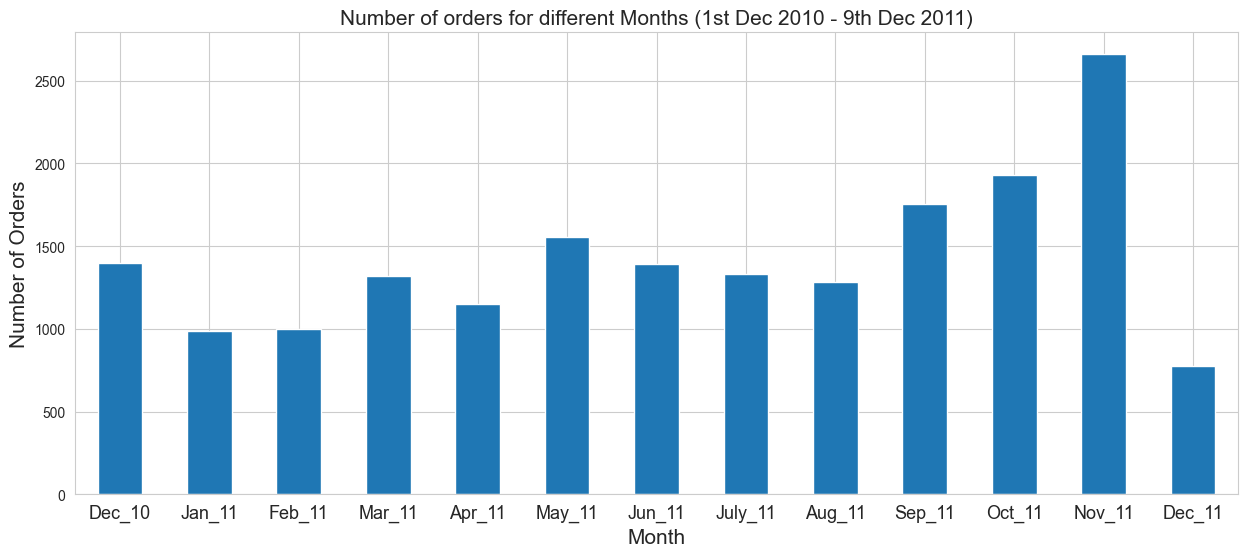

In [32]:
ax = df_new.groupby('invoice_num')['year_month'].unique().value_counts().sort_index().plot(kind='bar', figsize=(15, 6))
ax.set_xlabel('Month', fontsize=15)
ax.set_ylabel('Number of Orders', fontsize=15)
ax.set_title('Number of orders for different Months (1st Dec 2010 - 9th Dec 2011)', fontsize=15)
ax.set_xticklabels(('Dec_10', 'Jan_11', 'Feb_11', 'Mar_11', 'Apr_11', 'May_11', 'Jun_11', 'July_11', 'Aug_11', 'Sep_11', 'Oct_11', 'Nov_11', 'Dec_11'), rotation='horizontal', fontsize=13)
plt.show()

## How many orders (per day)?

In [33]:
df_new.groupby('invoice_num')['day'].unique().value_counts().sort_index()

[1]    2863
[2]    3185
[3]    3455
[4]    4033
[5]    2831
[7]    2169
Name: day, dtype: int64

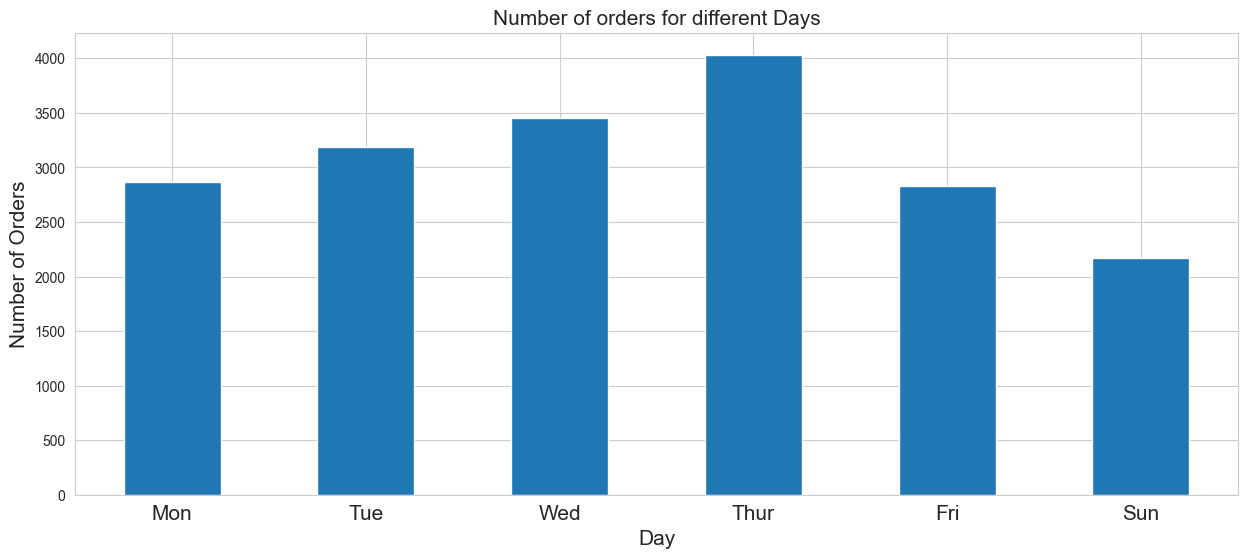

In [34]:
ax = df_new.groupby('invoice_num')['day'].unique().value_counts().sort_index().plot(kind='bar', figsize=(15, 6))
ax.set_xlabel('Day', fontsize=15)
ax.set_ylabel('Number of Orders', fontsize=15)
ax.set_title('Number of orders for different Days', fontsize=15)
ax.set_xticklabels(('Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sun'), rotation='horizontal', fontsize=15)
plt.show()

## How many orders (per hour)?

In [35]:
df_new.groupby('invoice_num')['hour'].apply(lambda x: list(set(x))).value_counts().iloc[:-1].sort_index()

[7]           29
[8]          555
[9]         1394
[10]        2226
[11]        2276
[11, 12]       1
[12]        3129
[13]        2637
[14]        2275
[15]        2038
[16]        1100
[17]         544
[18]         169
[19]         144
[20]          18
Name: hour, dtype: int64

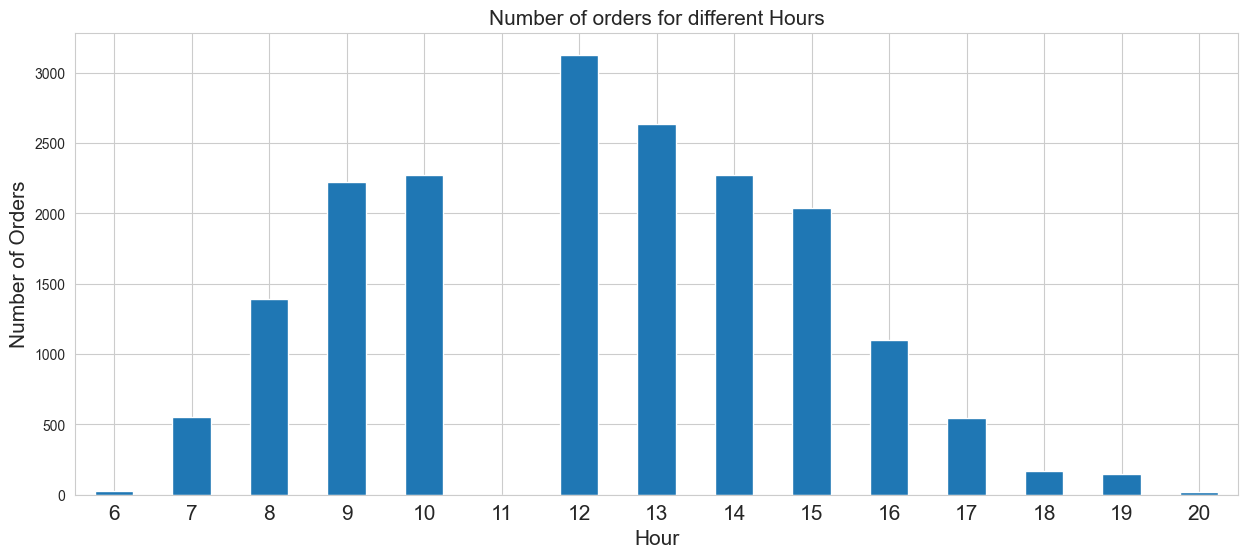

In [36]:
import matplotlib.pyplot as plt

unique_hours = df_new.groupby('invoice_num')['hour'].apply(lambda x: list(set(x)))
counts = unique_hours.value_counts().iloc[:-1].sort_index()

ax = counts.plot(kind='bar', color=color[0], figsize=(15, 6))
ax.set_xlabel('Hour', fontsize=15)
ax.set_ylabel('Number of Orders', fontsize=15)
ax.set_title('Number of orders for different Hours', fontsize=15)
ax.set_xticklabels(range(6, 21), rotation='horizontal', fontsize=15)

plt.show()


# Discover patterns for **<span class="girk">Unit Price</span>**

In [37]:
df_new.unit_price.describe()

count    397924.000000
mean          3.116174
std          22.096788
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: unit_price, dtype: float64

**We see that there are unit price = 0 (FREE items)**

<span class="mark">There are some free items given to customers from time to time</span>.

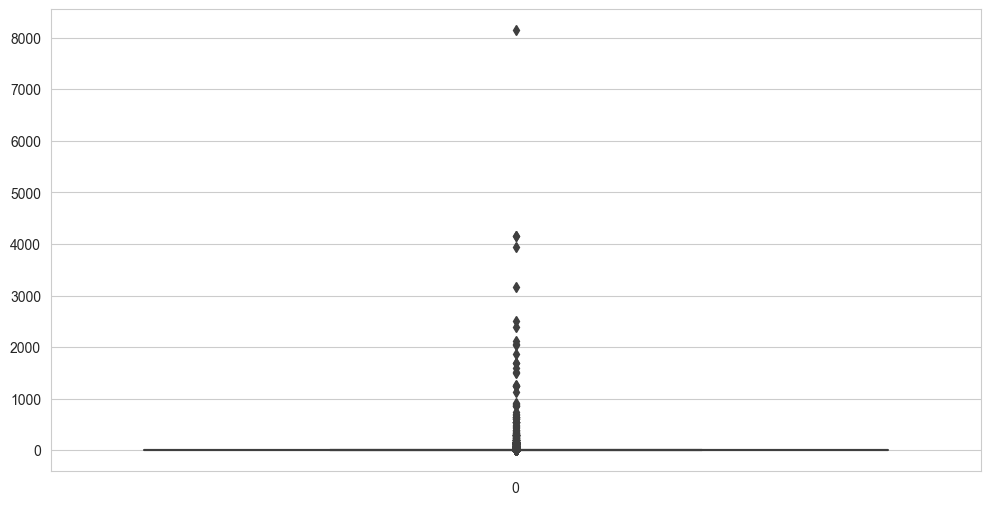

In [38]:
# check the distribution of unit price
plt.subplots(figsize=(12,6))
sns.boxplot(df_new.unit_price)
plt.show()

In [39]:
df_free = df_new[df_new.unit_price == 0]

In [40]:
df_free.head()

,invoice_num,invoice_date,year_month,month,day,hour,stock_code,description,quantity,unit_price,amount_spent,cust_id,country
9302,537197,2010-12-05 14:02:00,201012,12,7,14,22841,round cake tin vintage green,1,0.0,0.0,12647,Germany
33576,539263,2010-12-16 14:36:00,201012,12,4,14,22580,advent calendar gingham sack,4,0.0,0.0,16560,United Kingdom
40089,539722,2010-12-21 13:45:00,201012,12,2,13,22423,regency cakestand 3 tier,10,0.0,0.0,14911,EIRE
47068,540372,2011-01-06 16:41:00,201101,1,4,16,22090,paper bunting retrospot,24,0.0,0.0,13081,United Kingdom
47070,540372,2011-01-06 16:41:00,201101,1,4,16,22553,plasters in tin skulls,24,0.0,0.0,13081,United Kingdom


In [41]:
df_free.year_month.value_counts().sort_index()

201012     3
201101     3
201102     1
201103     2
201104     2
201105     2
201107     2
201108     6
201109     2
201110     3
201111    14
Name: year_month, dtype: int64

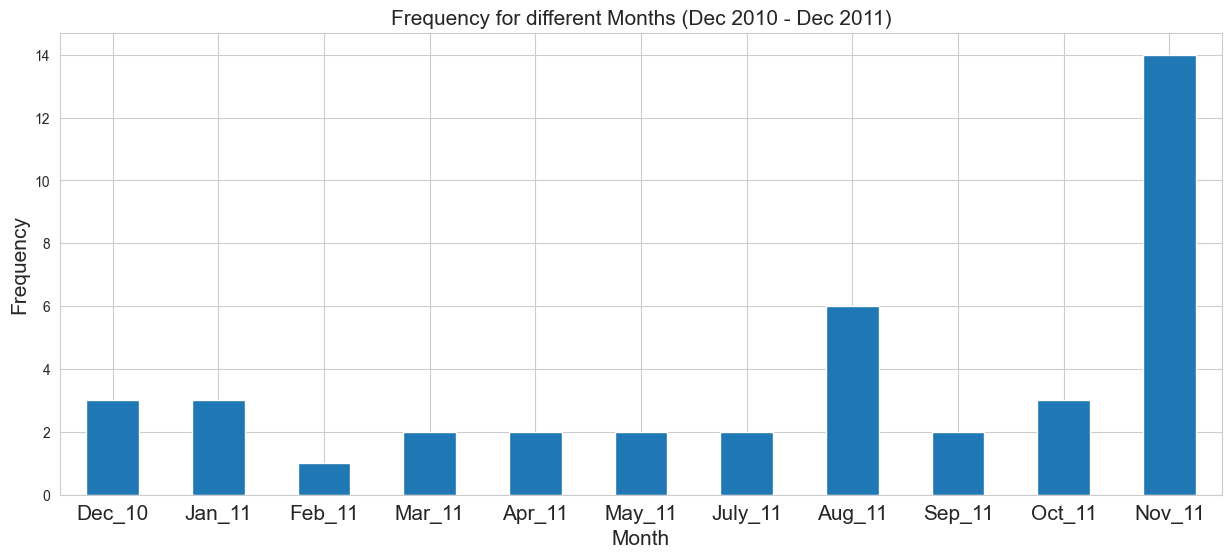

In [42]:
ax = df_free.year_month.value_counts().sort_index().plot(kind='bar', figsize=(15, 6))
ax.set_xlabel('Month', fontsize=15)
ax.set_ylabel('Frequency', fontsize=15)
ax.set_title('Frequency for different Months (Dec 2010 - Dec 2011)', fontsize=15)
ax.set_xticklabels(('Dec_10', 'Jan_11', 'Feb_11', 'Mar_11', 'Apr_11', 'May_11', 'July_11', 'Aug_11', 'Sep_11', 'Oct_11', 'Nov_11'), rotation='horizontal', fontsize=15)
plt.show()

**Not clear why there are FREE items given to certain customers**
- On average, the company <span class="mark">gave out 2-4 times FREE items</span> to customers <span class="mark">each month (Except in June 2011)</span>

# Discover patterns for each **<span class="girk">Country</span>**

In [43]:
df_new.head()

,invoice_num,invoice_date,year_month,month,day,hour,stock_code,description,quantity,unit_price,amount_spent,cust_id,country
0,536365,2010-12-01 08:26:00,201012,12,3,8,85123A,white hanging heart t-light holder,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,201012,12,3,8,71053,white metal lantern,6,3.39,20.34,17850,United Kingdom
2,536365,2010-12-01 08:26:00,201012,12,3,8,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850,United Kingdom
3,536365,2010-12-01 08:26:00,201012,12,3,8,84029G,knitted union flag hot water bottle,6,3.39,20.34,17850,United Kingdom
4,536365,2010-12-01 08:26:00,201012,12,3,8,84029E,red woolly hottie white heart.,6,3.39,20.34,17850,United Kingdom


## Stage 4: Feature Engineering and Data Transformation

In [44]:
# Create new features
# Example: Extracting month, day, and year from the Date column
df_new['invoice_date'] = pd.to_datetime(df_new['invoice_date'])
df_new['month'] = df_new['invoice_date'].dt.month
df_new['day'] = df_new['invoice_date'].dt.day
df_new['hour'] = df_new['invoice_date'].dt.year

# Transform features
# Example: Log transformation of Annual Spending to handle skewed distribution
df_new['LogAnnualSpending'] = np.log1p(df_new['amount_spent'])


## Stage 5: Predictive Model Building

In [45]:
# Import necessary libraries for modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split the data into training and testing sets
X = df_new[['month', 'day', 'hour']]  # Input features
y = df_new['amount_spent']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 20.329364775623777
Mean Squared Error: 5122.893509299305
R-squared: 0.00014032617489867505


## Stage 6: Model Evaluation and Customer Segmentation

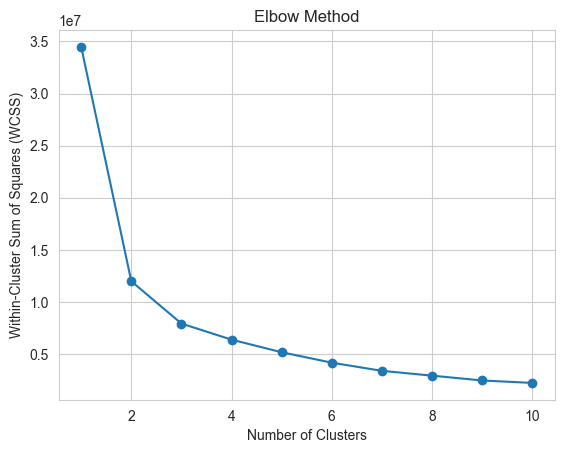

In [47]:
# Apply clustering techniques for customer segmentation
# Example: K-means clustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select the relevant features for clustering
X_cluster = df_new[['month', 'day', 'hour']]

# Initialize a list to store the within-cluster sum of squares (WCSS)
wcss = []

# Determine the optimal number of clusters using the elbow method
max_clusters = 10

for k in range(1, max_clusters+1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_cluster)
    wcss.append(kmeans.inertia_)

# Plot the within-cluster sum of squares (WCSS) against the number of clusters
plt.plot(range(1, max_clusters+1), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method')
plt.show()

## Stage 7: Interpretation of Results and Communication

In [48]:
# Interpret the results and draw insights
# Example: Analyze the feature importance from the linear regression model
feature_importance = model.coef_
print("Feature Importance:", feature_importance)

# Prepare a detailed report and present the findings
# You can use Jupyter Notebook, Markdown, or other reporting tools to document your findings and present them effectively.


Feature Importance: [-0.25287876 -0.08468707  0.03671247]


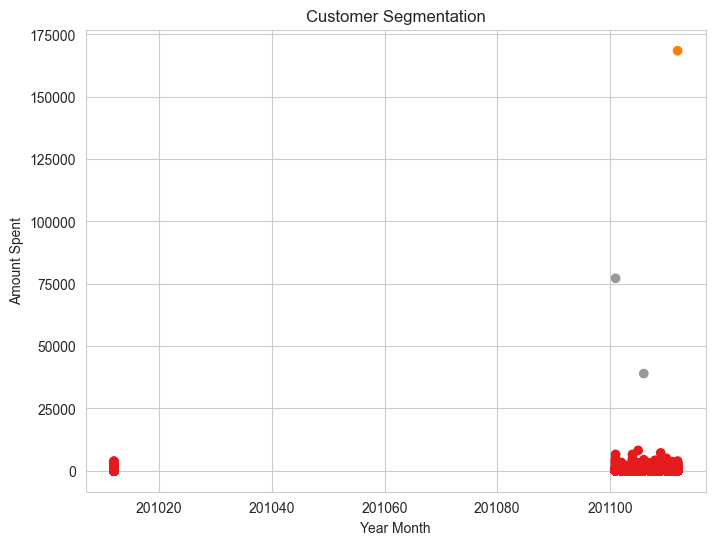

In [66]:
# Import necessary libraries for customer segmentation
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select the relevant features for customer segmentation
X_segment = df_new[['year_month', 'amount_spent']]

# Perform customer segmentation using K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_segment)
segment_labels = kmeans.labels_

# Add the segment labels to the dataset
df_new['Segment'] = segment_labels

# Visualize customer segmentation
plt.figure(figsize=(8, 6))
plt.scatter(df_new['year_month'], df_new['amount_spent'], c=df_new['Segment'], cmap='Set1')
plt.xlabel('Year Month')
plt.ylabel('Amount Spent')
plt.title('Customer Segmentation')
plt.show()
